In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import json
import pandas as pd
import plotly.graph_objects as go
import os

In [2]:
print(os.getcwd())

/Users/cd8607/Documents/Test_Potentials/Jupyter Notebooks


In [3]:
os.chdir('../')

In [4]:
def p_fit(x, y):

    N = len(x) + 2

    A1 = np.array([ [x[j]**i for i in range(N)] for j in range(len(x))])

    A2 = np.array([ [i*x[0]**np.clip(i-1, a_min = 0, a_max=None) for i in range(N)],
                    [i*x[-1]**np.clip(i-1, a_min = 0, a_max=None) for i in range(N)] ] )

    A = np.vstack([A1, A2])
    
    y = y.reshape(len(y), 1)

    b = np.vstack([y, np.zeros([2, 1])])
    
    return np.linalg.solve(A, b)


def p_val(a, x):
    return np.sum(np.array([[a[i]*x[j]**i for i in range(len(a))] for j in range(len(x))]), axis = 1)

In [5]:
with open('log.lammps', 'r') as file:
    log = file.readlines()

val = log[-1].split()

data = np.array(val[-14:]).astype(float)

data = data.reshape(7,2)

data[:,1] -= data[:,1].min()

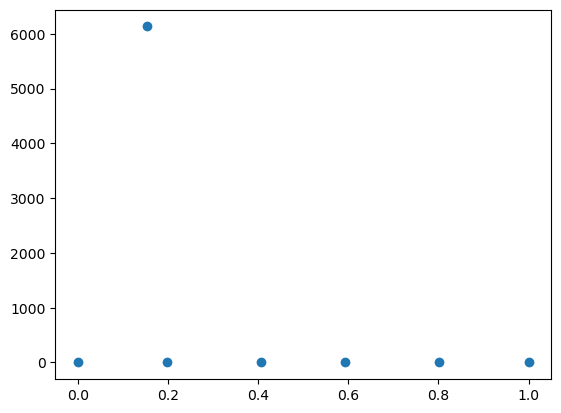

In [6]:
plt.scatter(data[:,0], data[:,1])

(100, 1)


Text(0, 0.5, 'Energy /eV')

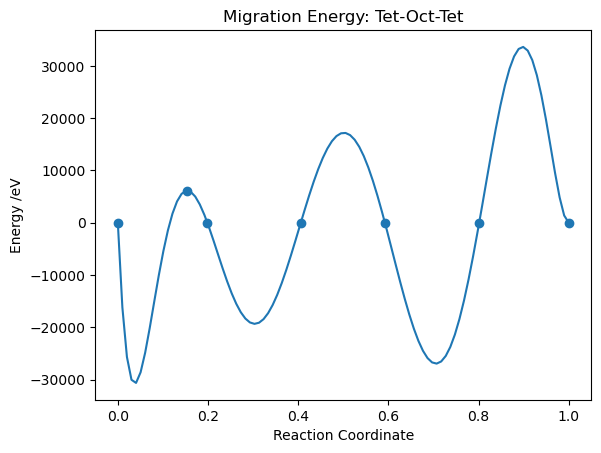

In [7]:
a = p_fit(data[:,0], data[:,1])

x = np.linspace(0,1,100)

y_fit = p_val(a, x)

print(y_fit.shape)

plt.plot(x,y_fit)
plt.scatter(data[:,0], data[:,1])
plt.title('Migration Energy: Tet-Oct-Tet')
plt.xlabel('Reaction Coordinate')
plt.ylabel('Energy /eV')

In [8]:
np.savetxt('Migration_Data/he_tet-oct-tet.txt', data)

In [9]:
def plt_data(fig, filename, dataname, color):

    data = np.loadtxt(filename)
    
    fig.add_trace(go.Scatter(
        x=data[:,0],
        y=data[:,1],
        mode='markers',
        name=dataname,
        marker=dict(size=10, color=color),
        text= dataname + ' points'
    ))

    a = p_fit(data[:,0], data[:,1])

    x_fit = np.linspace(0,1,100)

    y_fit = p_val(a, x_fit).reshape(100,)

    fig.add_trace(go.Scatter(
        x=x_fit,
        y=y_fit,
        mode='lines',
        name=dataname,
        marker=dict(size=10, color=color),
        text= dataname + ' fit'
    ))

    return fig


In [10]:
fig = go.Figure()

fig = plt_data(fig, 'Migration_Data/h_tet-tet.txt', 'h_tet_tet', 'blue')

fig = plt_data(fig, 'Migration_Data/h_tet-oct-tet.txt', 'h_tet_oct_tet', 'red')

fig.update_layout(
    title= 'Migration Barriers for Hydrogen Intersitials',
    xaxis=dict(title='Reaction Coordinate'),
    yaxis=dict(title='Energy /eV')
)

fig.show()


In [11]:
fig = go.Figure()

fig = plt_data(fig, 'Migration_Data/he_tet-tet.txt', 'he_tet_tet', 'blue')

fig = plt_data(fig, 'Migration_Data/he_tet-oct-tet.txt', 'he_tet_oct_tet', 'red')

fig.update_layout(
    title= 'Migration Barriers for Helium Intersitials',
    xaxis=dict(title='Reaction Coordinate'),
    yaxis=dict(title='Energy /eV')
)

fig.show()